# Costi Riscossione Tributi

Questa analisi ha come obiettivo approfondire come i costi per **la riscossione dei tributi** si distribuisce in Italia. In particolare:
- Analizzeremo la sua distribuzione normalizzata per il numero di contribuenti per le varie Regioni.
- Cercheremo di capire quali sono le top/last regioni/province/comuni per spesa riscossione tributi

In [1]:
import numpy as np
import pandas as pd

# set the max number of columns to display
pd.options.display.max_columns = 98

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

import plotly.offline as py
import plotly.plotly as py_on
import plotly.graph_objs as go
from plotly import tools
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)

from IPython.display import Image
from IPython.display import display

Il dataset preso in analisi contiene informazioni sui **costi riscossione tributi per 2010-2013 (OpenCivitas)**  e i **redditi dei contribuenti (Mef dati Irpef)** per lo stesso periodo. In totale abbiamo 26800 osservazioni distribuite per anno:

In [2]:
fattore = 'costo riscossione tributi'
fattore_descrizione = 'Costo Riscossione Tributi'

tot_contribuenti = 'tot_contribuenti'

fattore_normalizzato = 'spesa_tributi_per_contribuenti'

In [3]:
df = pd.read_csv('./data/opencivitas_spesa_storica_dati_irpef.csv')
df.shape

(26799, 86)

Distribuzione delle osservazioni Anno e Comuni per cui abbiamo rilevazioni per l'anno in questione.
Si può osservare che la distribuzione delle osservazioni rimane costante nell'intervallo in esame.
Considerando che il numero di comuni italiani è 7.982, si stanno analizzando l'84% della popolazione totale. 

In [4]:
df.groupby(['ANNO'])[fattore].count()

ANNO
2010    6702
2011    6699
2012    6699
2013    6699
Name: costo riscossione tributi, dtype: int64

-----------------------

In [5]:
df_regione = df.groupby(df.Regione).sum()
df_regione[fattore_normalizzato] = (df_regione[fattore] / df_regione[tot_contribuenti])

In [6]:
data_pie = [
    go.Pie(labels = df_regione.index, values=df_regione[fattore]),
]

layout_pie = go.Layout(
    title='Costo medio riscossione tasse per Regione/Contribuente in Euro'
)

fig_pie = go.Figure(data=data_pie, layout=layout_pie)

data_bar = go.Bar(x=df_regione.index, y=df_regione[fattore_normalizzato], name = 'spesa media per regione')


media_costo_tot = df_regione[fattore_normalizzato].mean()
data_scatter = go.Scatter(x=df_regione.index, y=[media_costo_tot for i in range(len(df_regione))], name = 'spesa media nazionale')

data = [data_bar, data_scatter]


layout_bar = go.Layout(
    title='Costo medio riscossione tasse per Regione/Contribuente in Euro',
    xaxis=dict(
        title='Regioni',
    ),
    yaxis=dict(
        title='Euro per Contribuente',
    )
)

fig_bar = go.Figure(data=data, layout=layout_bar)

In [7]:
data_pie_contribuenti = [
    go.Pie(labels = df_regione.index, values=df_regione["tot_contribuenti"]),
]

layout_pie_contribuenti = go.Layout(
    title='Contribuenti'
)

fig_pie_contribuenti = go.Figure(data=data_pie_contribuenti, layout=layout_pie_contribuenti)


media_italiana_contribuenti = df_regione["tot_contribuenti"].mean()

data_contribuenti = [
    go.Bar(x=df_regione.index, y=df_regione[tot_contribuenti], name='numero contribuenti per regione'),  
    go.Scatter(x=df_regione.index, y=[media_italiana_contribuenti for i in range(len(df_regione))], name='media italiana numero contribuenti')
]


layout_bar_contribuenti = go.Layout(
    title='Numero Totale Contribuenti per Regione',
    xaxis=dict(
        title='Regioni',
    ),
    yaxis=dict(
        title='Numero Contribuenti',
    )
)

fig_bar_contribuenti = go.Figure(data=data_contribuenti, layout=layout_bar_contribuenti)

## Costo Riscossione Tributi per Regione

Per prima cosa analizziamo quali sono le regioni che hanno maggiori costi per la riscossione delle tasse.
Possiamo osservare che per il periodo 2010-2013 la Liguria sia la regione con li maggior costo procapite per la riscossione dei tributi. La tabella sotto mostra il dettaglio dei costi. 

Mentre, il grafico a torta fa vedere la distribuzione percentuale di questi costi sul totale delle regioni presenti nel dataset.

In [8]:
df_regione.sort_values("spesa_tributi_per_contribuenti", ascending=False).head()

,ANNO,costo riscossione tributi,tot costo riscossione tributi,costo ufficio tecnico,tot costo ufficio tecnico,"costo anagrafe, stato civile","tot costo anagrafe, stato civile",costo altri servizi,tot costo altri servizi,costo polizia locale,tot costo polizia locale,costo istruzione,tot costo istruzione,costo viabilita',tot costo viabilita',costo trasporti,tot costo trasporti,costo territorio,tot costo territorio,costo ambiente,tot costo ambiente,costo sociale,tot costo sociale,costo asili nido,tot costo asili nido,costo spesa totale,tot costo spesa totale,Addizionale comunale dovuta Ammontare,Addizionale comunale dovuta Frequenza,Addizionale regionale dovuta Ammontare,Addizionale regionale dovuta Frequenza,Anno di imposta,Codice Istat Comune,Codice Istat Regione,Imposta netta Ammontare,Imposta netta Frequenza,Numero contribuenti,Reddito complessivo da 0 a 10000 euro Ammontare,Reddito complessivo da 0 a 10000 euro Frequenza,Reddito complessivo da 10000 a 15000 euro Ammontare,Reddito complessivo da 10000 a 15000 euro Frequenza,Reddito complessivo da 15000 a 26000 euro Ammontare,Reddito complessivo da 15000 a 26000 euro Frequenza,Reddito complessivo da 26000 a 55000 euro Ammontare,Reddito complessivo da 26000 a 55000 euro Frequenza,Reddito complessivo da 55000 a 75000 euro Ammontare,Reddito complessivo da 55000 a 75000 euro Frequenza,Reddito complessivo da 75000 a 120000 euro Ammontare,Reddito complessivo da 75000 a 120000 euro Frequenza,Reddito complessivo oltre 120000 euro Ammontare,Reddito complessivo oltre 120000 euro Frequenza,Reddito da fabbricati Ammontare,Reddito da fabbricati Frequenza,Reddito da lavoro dipendente e assimilati Ammontare,Reddito da lavoro dipendente e assimilati Frequenza,Reddito da pensione Ammontare,Reddito da pensione Frequenza,Reddito imponibile Ammontare,Reddito imponibile Frequenza,Reddito imponibile addizionale Ammontare,Reddito imponibile addizionale Frequenza,Reddito imponibile addizionale IRPEF Ammontare,Reddito imponibile addizionale IRPEF Frequenza,tot_contribuenti,Reddito lavoro autonomo Ammontare,Reddito lavoro autonomo Frequenza,Reddito da partecipazione Ammontare,Reddito da partecipazione Frequenza,Reddito imprenditore ordinario Ammontare,Reddito imprenditore ordinario Frequenza,Reddito imprenditore semplificata Ammontare,Reddito imprenditore semplificata Frequenza,Cod Istat,Reddito minore o uguale a zero Frequenza,Reddito minore o uguale a zero Ammontare,spesa_tributi_per_contribuenti
Regione,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
LAZIO,3041388,3.168019e+08,8.688880e+11,5.716576e+08,1.561587e+12,2.704210e+08,8.758288e+11,3.366483e+09,9.033465e+12,2.049437e+09,4.036053e+12,2.307503e+09,5.366810e+12,1.170081e+09,3.575083e+12,1.643651e+09,1.424151e+12,9.876832e+08,2.586042e+12,4.992385e+09,1.248671e+13,2.592058e+09,7.223208e+12,1.205375e+09,1.750050e+12,1.047213e+10,2.539583e+13,1.214945e+09,5466692.0,2.643004e+09,5684494.0,3041388.0,43925320.0,9072.0,3.516809e+10,5878799.0,7728190.0,2.200914e+10,4723586.0,2.452278e+10,1966958.0,8.373783e+10,4147597.0,1.163050e+11,3322276.0,2.521806e+10,395788.0,2.836402e+10,308759.0,3.341094e+10,151267.0,6.128523e+09,1503690.0,8.979876e+10,3934377.0,4.842269e+10,2621282.0,1.615144e+11,7425489.0,1.531381e+11,5686127.0,1.516947e+11,5771056.0,15088932.0,8.156609e+09,225798.0,4.483684e+09,276446.0,628153052.0,24679.0,4.168198e+09,273015.0,87850640.0,72701.0,-712292787.0,20.995650
MOLISE,1094256,1.793921e+07,3.126158e+11,3.421319e+07,5.618408e+11,1.853914e+07,3.151130e+11,1.679047e+08,3.250136e+12,4.727739e+07,1.452125e+12,6.281326e+07,1.930916e+12,6.936311e+07,1.286273e+12,6.267626e+06,5.123930e+11,5.237064e+07,9.304278e+11,1.348824e+08,4.492573e+12,7.042110e+07,2.598826e+12,8.707969e+06,6.296477e+11,3.310870e+08,9.137124e+12,3.111734e+07,249309.0,1.147230e+08,275953.0,1094256.0,21545896.0,3808.0,1.053451e+09,283946.0,437651.0,1.806945e+09,381150.0,1.642958e+09,134263.0,4.262883e+09,214548.0,3.901221e+09,116589.0,5.820986e+0

In [20]:
py.iplot(fig_pie)
py.iplot(fig_bar)
py.iplot(fig_bar_contribuenti)
py.iplot(fig_pie_contribuenti)

fig_pie_path = 'imgs/tributi_regione_pie.png'
fig_bar_path = 'imgs/tributi_regione_bar.png'
fig_bar_contribuenti_path = 'imgs/contribuenti_regione_bar.png'
fig_pie_contribuenti_path = 'imgs/contribuenti_regione_pie.png'

py_on.image.save_as(fig_pie, filename=fig_pie_path)
py_on.image.save_as(fig_bar, filename=fig_bar_path)
py_on.image.save_as(fig_bar_contribuenti, filename=fig_bar_contribuenti_path)
py_on.image.save_as(fig_pie_contribuenti, filename=fig_pie_contribuenti_path)

#x = Image(fig_pie_path)
#y = Image(fig_bar_path)
#z = Image(fig_bar_contribuenti_path)
#w = Image(fig_pie_contribuenti_path)
#display(x,y,z,w)

In [ ]:
sum_costo_medio = df_regione[fattore].sum()
sum_numero_contribuenti = df_regione[tot_contribuenti].sum()
df_regione.loc[:, fattore] /= sum_costo_medio 
df_regione.loc[:, tot_contribuenti] /= sum_numero_contribuenti 

data = [go.Bar(x=df_regione.index, y=df_regione[fattore], name = 'percentuale spesa'),
        go.Bar(x=df_regione.index, y=df_regione[tot_contribuenti], name = 'percentuale contribuenti')
           ]

layout_bar_contribuenti_spesa = go.Layout(
    title='Numero Totale Contribuenti per Regione',
    xaxis=dict(
        title='Regioni',
    ),
    yaxis=dict(
        title='Confronto Spesa-Contribuenti',
    )
)

fig_bar_spesa_contribuenti = go.Figure(data=data, layout=layout_bar_contribuenti_spesa)

py.iplot(fig_bar_spesa_contribuenti)

fig_bar_spesa_contribuenti_path = 'imgs/spesa_contribuenti_regione_bar.png'

py_on.image.save_as(fig_pie, filename=fig_bar_spesa_contribuenti_path)

#i = Image(fig_bar_spesa_contribuenti_path)

Si elencano di seguito le regioni italiane in rapporto al costo medio di riscossione tasse per contribuente. In particolare, si può oseervare come il Veneto sia la regione con il più basso costo di riscossione tasse per contribuente, seguito da Emilia Romagna, Umbria, Marche e Lombardia. Troviamo invece in code Calabria, Molise e Lazio.

In [13]:
df_regione["spesa_tributi_per_contribuenti"].sort_values(ascending=True)

Regione
VENETO            11.066791
EMILIA-ROMAGNA    14.308776
UMBRIA            14.420277
MARCHE            14.551420
LOMBARDIA         14.825448
PIEMONTE          15.200880
BASILICATA        15.401712
ABRUZZO           17.389323
TOSCANA           17.507800
PUGLIA            18.677372
LIGURIA           18.700978
CAMPANIA          19.895792
CALABRIA          20.452651
MOLISE            20.629573
LAZIO             20.995650
Name: spesa_tributi_per_contribuenti, dtype: float64

### Distribuzione Redditi

Analizziamo ora come sia distribuita la contribuzione fiscale da parte dei contribuenti.
In particolare, analizziamo le diverse fonti di reddito dal punto di vista di:

1. distribuzione contribuenti
2. distribuzione introiti

Qui sotto consideriamo quali sono i fattori per l'analisi:

In [38]:
fattori = [c for c in df.columns.values if c.startswith('Reddito') and 'Frequenza' in c]


Dai quali selezioniamo i redditi da lavoro

In [15]:
frequenza_reddito_scaglioni = [
 ('Regione','Reddito minore o uguale a zero Frequenza', '0M'),
 ('Regione','Reddito complessivo da 0 a 10000 euro Frequenza', '0-10M'),
 ('Regione','Reddito complessivo da 10000 a 15000 euro Frequenza', '10-15M'),
 ('Regione','Reddito complessivo da 15000 a 26000 euro Frequenza', '15-26M'),
 ('Regione','Reddito complessivo da 26000 a 55000 euro Frequenza', '26-55M'),
 ('Regione','Reddito complessivo da 55000 a 75000 euro Frequenza', '55-75M'),
 ('Regione','Reddito complessivo da 75000 a 120000 euro Frequenza', '75-120M'),
 ('Regione','Reddito complessivo oltre 120000 euro Frequenza', '>120M'),
]

fattori_frequenza = [v for _, v, _ in frequenza_reddito_scaglioni]

### Frequenza contribuenti per fascia economica

Consideriamo di seguito la distribuzione dei contribuenti di alcune regioni italiane per fasce di reddito.
L'istogramma e la tabella sotto mostra la frequenza di contribuenti per fascia di reddito.
Inoltre, di seguito viene mostrata la stessa quantita' in valore percentuale. Questo serve a vedere la contribuzione delle varie fasce di reddito per Regione di interesse.

### Contribuzione per fascia di reddito in percentuale

In [39]:
regioni_interesse = ["VENETO", "LOMBARDIA", "PIEMONTE","BASILICATA", "PUGLIA", "CALABRIA", "LAZIO" ]
df_regione_sum = df_regione

In [40]:
frequenza_redditi_percentuale = df_regione_sum.loc[regioni_interesse,fattori_frequenza].reset_index()
tot_contribuenti_regione = df_regione_sum.loc[regioni_interesse,tot_contribuenti].reset_index()

frequenza_redditi_percentuale[fattori_frequenza] = frequenza_redditi_percentuale[fattori_frequenza].div(
    tot_contribuenti_regione[tot_contribuenti], axis='index')
frequenza_redditi_percentuale

,Regione,Reddito minore o uguale a zero Frequenza,Reddito complessivo da 0 a 10000 euro Frequenza,Reddito complessivo da 10000 a 15000 euro Frequenza,Reddito complessivo da 15000 a 26000 euro Frequenza,Reddito complessivo da 26000 a 55000 euro Frequenza,Reddito complessivo da 55000 a 75000 euro Frequenza,Reddito complessivo da 75000 a 120000 euro Frequenza,Reddito complessivo oltre 120000 euro Frequenza
0,VENETO,0.004087,0.275209,0.150456,0.350488,0.180071,0.018856,0.014061,0.006771
1,LOMBARDIA,0.003679,0.242341,0.136778,0.349111,0.212351,0.026091,0.019055,0.010593
2,PIEMONTE,0.004349,0.257435,0.148984,0.353733,0.194727,0.019577,0.014668,0.006527
3,BASILICATA,0.005092,0.435145,0.162585,0.250376,0.128660,0.009096,0.007085,0.001960
4,PUGLIA,0.006047,0.422249,0.167240,0.246091,0.136243,0.010879,0.008391,0.002860
5,CALABRIA,0.006642,0.484535,0.150094,0.217416,0.123305,0.009726,0.006695,0.001587
6,LAZIO,0.004818,0.313050,0.130358,0.274877,0.220180,0.026230,0.020463,0.010025


In [41]:
frequenza_reddito_scaglioni

[('Regione', 'Reddito minore o uguale a zero Frequenza', '0M'),
 ('Regione', 'Reddito complessivo da 0 a 10000 euro Frequenza', '0-10M'),
 ('Regione', 'Reddito complessivo da 10000 a 15000 euro Frequenza', '10-15M'),
 ('Regione', 'Reddito complessivo da 15000 a 26000 euro Frequenza', '15-26M'),
 ('Regione', 'Reddito complessivo da 26000 a 55000 euro Frequenza', '26-55M'),
 ('Regione', 'Reddito complessivo da 55000 a 75000 euro Frequenza', '55-75M'),
 ('Regione',
  'Reddito complessivo da 75000 a 120000 euro Frequenza',
  '75-120M'),
 ('Regione', 'Reddito complessivo oltre 120000 euro Frequenza', '>120M')]

In [42]:
media = dict( [(x[1], frequenza_redditi_percentuale[x[1]].mean()) for x in frequenza_reddito_scaglioni])
media.get("Reddito complessivo da 0 a 10000 euro Frequenza")

0.34713773325726655

In [43]:
frequenza_redditi_percentuale["Regione"].append(pd.Series(['ITALIA']))

0        VENETO
1     LOMBARDIA
2      PIEMONTE
3    BASILICATA
4        PUGLIA
5      CALABRIA
6         LAZIO
0        ITALIA
dtype: object

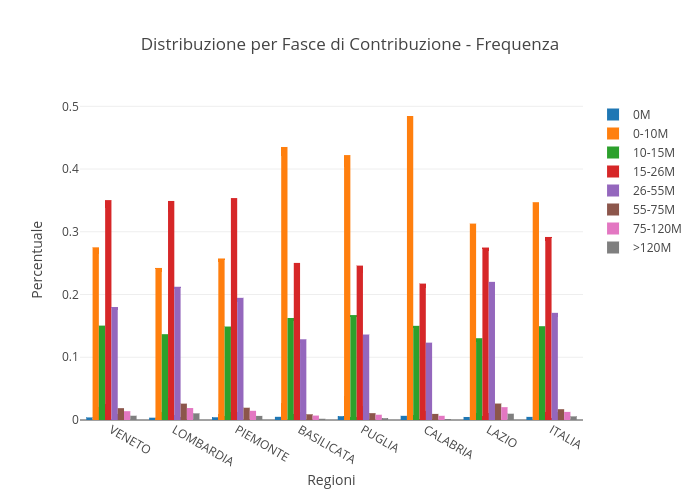

In [44]:
media = dict( [(x[1], frequenza_redditi_percentuale[x[1]].mean()) for x in frequenza_reddito_scaglioni])

data_frequenza = []
for x,y,name in frequenza_reddito_scaglioni:
    
    val_it = media.get(y)
    
    bar = go.Bar(
        x = frequenza_redditi_percentuale[x].append(pd.Series(['ITALIA'])),
        y = frequenza_redditi_percentuale[y].append(pd.Series([val_it])),
        name = name
    )
    
    
    data_frequenza.append(bar)    
    
layout = go.Layout(
    title='Distribuzione per Fasce di Contribuzione - Frequenza',
    xaxis=dict(
        title='Regioni',
    ),
    yaxis=dict(
        title='Percentuale',
    )
)

fig = go.Figure(layout=layout, data=data_frequenza)
py.iplot(fig)

fig_path = 'imgs/percentuale_contribuenti_reddito.png'
py_on.image.save_as(fig, filename=fig_path)
x = Image(fig_path)
display(x)